<a href="https://colab.research.google.com/github/DSabarish/Practice/blob/main/2_Notes_LR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content
- Overview of Cars24 Data
  - Loading the data
  - Target Variable Encoding and Scaling revised
- Data Notation
  - Supervised learning revision
  - Data Notation
- Goal of ML: Generalization
  - Training, testing split

- Linear Regression Intuition
  - Univariate
  - Multivariate

- Implementation using Sklearn


- Evaluation metric
  - MSE and MAE
  - R2 Score

- Model Interpretability
  - Understanding the model


## Overview of Cars24 Data

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/535/original/z.png?1705058211' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/537/original/z.png?1705058272' width=800>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 32.4MB/s]


In [3]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/541/original/z.png?1705059158' width=800>

### Target variable encoding

In [4]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/543/original/z.png?1705059363' width=800>




<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/904/original/download.jpeg?1723532115' width=800>


For our data,
- we will be using **mean** to encode the columns.

In [6]:
df['make']  = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


### Scaling the data -

Notice one more thing:

- `km_driven` is in the ranges of 10000s,
- while `age` is in the range of 10s.


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/544/original/z.png?1705059425' width=800>





<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/905/original/download_%281%29.jpeg?1723532143' width=800>


**Tip:** </br>
Apart from MinMaxScaler, you can also try out various methods to see which works the best.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Data Notation

Let's look at few notations we will be following throughout machine learning.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/545/original/z.png?1705059527' width=800>

## Goal of ML: Generalization

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/705/original/z.png?1705223589' width=800>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/706/original/z.png?1705223634' width=800>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/707/original/z.png?1705223745' width=800>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/708/original/z.png?1705223812' width=800>

Now let's see how we can split our data.

We will be using sklearn's `test_train_split` function for this.

In [8]:
from sklearn.model_selection import train_test_split

From our data:
- The output data, `y` is the column `selling_price`
- Remaining columns are the input data, `X`

In [9]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

So we have to,
- predict 1 output feature
- using 17 input features.


Now let's split the data.

We will divide it into 70:30 ratio:
- 70% for training,
- and 30% for testing.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [12]:
X_test.shape, y_test.shape

((5946, 17), (5946,))

We will use
- `X_train` and `y_train` to train our model,
- and `X_test` and `y_test` to evaluate the model's performance.

## Linear Regression Intuition

### Univariate

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/709/original/z.png?1705223874' width=800>

<br> <br>




<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/710/original/z.png?1705223929' width=800>


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/907/original/download_%282%29.jpeg?1723532257' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/908/original/download_%283%29.jpeg?1723532279' width=800>


### Multivariate

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/711/original/z.png?1705223986' width=800>



<br><br>


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/712/original/z.png?1705224121' width=800>


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/909/original/download_%284%29.jpeg?1723532341' width=800>


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/910/original/download_%285%29.jpeg?1723532363' width=800>


## Lin Reg using sklearn






### Univariate

Let's first take a single variable and train our model.

In [13]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([0.9967642])

In [16]:
model.intercept_

0.0015237505846132926

In [17]:
y_hat = model.predict(X1)

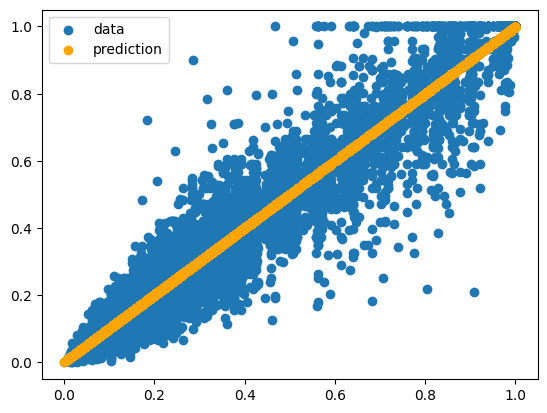

In [18]:
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

Notice,
- how the predicted values form a line similar to a regression line.

### Multivariate

Let's now generalize our model for the whole data.

In [19]:
print(X.shape, y.shape)

(19820, 17) (19820,)


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.coef_

array([ 7.23841536e+11, -2.51220703e-01, -2.32080290e-01,  7.38658783e-02,
        4.73509875e-02,  7.23841536e+11,  6.62781514e-02,  8.58883138e-01,
       -7.19530740e-03, -7.04840475e-03,  7.02301570e-03,  1.32939789e-01,
        1.50197491e-02, -6.81663270e-03, -3.67552817e-03, -1.62643318e-02,
       -2.35875305e-02])

In [22]:
model.intercept_

-723841536283.9093

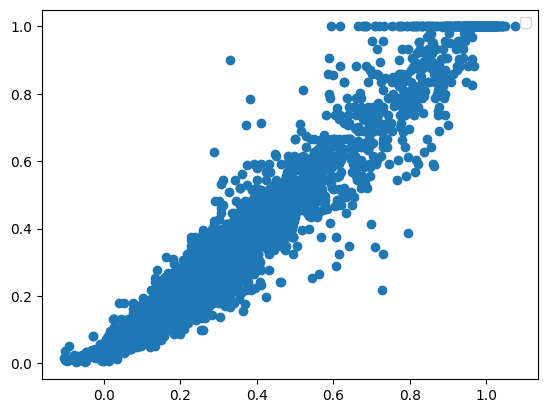

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)
plt.legend()
plt.show()

## Evaluation Metric

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/713/original/z.png?1705224186' width=800>



<br> <br>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/714/original/z.png?1705224269' width=800>



<br><br>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/715/original/z.png?1705224313' width=800>



<br><br>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/716/original/z.png?1705224362' width=800>



<br><br>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/717/original/z.png?1705224402' width=800>



<br><br>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/718/original/z.png?1705224451' width=800>



<br><br>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/719/original/z.png?1705224516' width=800>





**Note:** </br>
We will be using the above functions later to understand how Linear Regression works under the hood, </br> and the optimization behind it.

#### What is R2 Score, or the coefficient of determination?



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/721/original/z.png?1705224628' width=800>



<br>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/722/original/z.png?1705224711' width=800>



<br>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/724/original/z.png?1705224754' width=800>




<br>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/725/original/z.png?1705224796' width=800>

#### Let's check the performance of our previously trained model on test data.

\
LinearRegression's default `.score()` function uses R2 score to evaluate the data.

In [24]:
model.score(X_train, y_train)

0.9459034605687363

In [25]:
model.score(X_test, y_test)

0.9459866081087737

## Model Interpretability

### Understanding our model

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/726/original/z.png?1705224923' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/727/original/z.png?1705224970' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/728/original/z.png?1705225011' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/729/original/z.png?1705225050' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/730/original/z.png?1705225092' width=800>

#### So which feature do you think is the most important in our case?

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/912/original/download_%286%29.jpeg?1723532628' width=800>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/913/original/download_%287%29.jpeg?1723532647' width=800>

In [26]:
model.coef_

array([ 7.23841536e+11, -2.51220703e-01, -2.32080290e-01,  7.38658783e-02,
        4.73509875e-02,  7.23841536e+11,  6.62781514e-02,  8.58883138e-01,
       -7.19530740e-03, -7.04840475e-03,  7.02301570e-03,  1.32939789e-01,
        1.50197491e-02, -6.81663270e-03, -3.67552817e-03, -1.62643318e-02,
       -2.35875305e-02])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

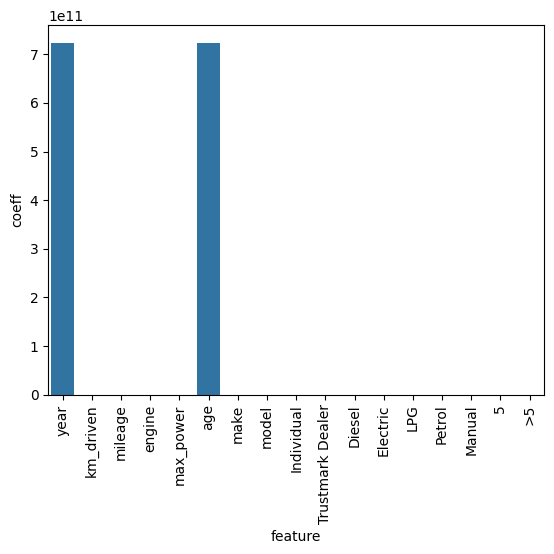

In [27]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [28]:
X_test.columns[np.argmax(np.abs(model.coef_))]

'year'

In [29]:
X_test.columns[np.argmin(np.abs(model.coef_))]

'Manual'

So,
- `year` is most important feature,
- while `manual` is the least important.